<a href="https://colab.research.google.com/github/Alf-caput/NFL2022_TacklePredictNN/blob/dev1/Practica_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NFL Big Data Bowl 2024

Kaggle lanza el concurso NFL Big Data Bowl 2024 sponsorizado por National Football League con un premio de $100,000.
https://www.kaggle.com/c/nfl-big-data-bowl-2024

## INTRODUCCIÓN

El fútbol americano es un deporte complejo donde la tarea principal de los defensores es derribar al portador del balón, mientras que este último busca avanzar en el campo. El siguiente proyecto tiene como objetivo crear métricas para valorar elementos clave en los placajes.

Se utiliza la información de las estadísticas Next Gen de la NFL, incluyendo datos de seguimiento de jugadores de las primeras nueve semanas de la temporada 2022. Estos datos abarcan la ubicación, velocidad y aceleración de los 22 jugadores en el campo, así como la posición del balón. Además, se incorporan datos de evaluación de jugadores de PFF y estadísticas avanzadas de la NFL, como puntos esperados y probabilidad de victoria.

La finalidad del proyecto es presentar los resultados a la NFL. Las métricas y análisis destacados podrían ser utilizados por los equipos de la NFL para evaluar a sus jugadores tanto en el ámbito ofensivo como defensivo.

## OBJETIVOS DEL CONCURSO

Se pide generar ideas prácticas, novedosas y ejecutables a partir de los datos de seguimiento de jugadores relacionados con los placajes. Algunos ejemplos incluyen, pero no se limitan a:

- Predicciones del tiempo, probabilidad y/o ubicación del derribo.
- Rango de derribo: ángulo de persecución, velocidad y aceleración, velocidad de cierre.
- Evaluación del jugador (por ejemplo, yardas salvadas, valor del derribo, derribos fallidos).
- Asignación de créditos (por ejemplo, un jugador realiza un derribo debido a otro jugador, bloqueos superados, área de influencia).
- Tipo de derribo (individual vs. en grupo, en campo abierto vs. en las trincheras, etc.).
- Roles y responsabilidades del equipo y los jugadores (marcar el límite, ocupar huecos, etc.).

Es importante destacar que la lista anterior no es exhaustiva y se anima a los participantes a ser creativos con sus propuestas.







# Descarga del dataset

Descargamos el dataset que ha sido previamente subido a google drive.

In [1]:
import gdown

id = '1V_fIjH-WGHTVgyRkdNFkZ6XxiqDoaMrA'
folder = 'nfl-big-data-bowl-2024'
endpoint = '.zip'

url = f'https://drive.google.com/uc?id={id}'

output = folder + endpoint

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1V_fIjH-WGHTVgyRkdNFkZ6XxiqDoaMrA
To: /content/nfl-big-data-bowl-2024.zip
100%|██████████| 293M/293M [00:10<00:00, 28.5MB/s]


'nfl-big-data-bowl-2024.zip'

Descomprimimos la carpeta `nfl-big-data-bowl-2024.zip` que se ha descargado.

In [2]:
from zipfile import ZipFile

with ZipFile(output, 'r') as zObject:
	zObject.extractall(folder)

Creamos una lista que contiene cada archivo `.csv` de la carpeta ya descomprimida y la ordenamos.

In [3]:
import pandas as pd
import os

csv_files = [file for file in os.listdir(folder) if file.endswith('.csv')]
csv_files.sort()

Dentro de la carpeta `nfl-big-data-bowl-2024` se encuentran los csv que utilizaremos.

In [4]:
print(csv_files)

['games.csv', 'players.csv', 'plays.csv', 'tackles.csv', 'tracking_week_1.csv', 'tracking_week_2.csv', 'tracking_week_3.csv', 'tracking_week_4.csv', 'tracking_week_5.csv', 'tracking_week_6.csv', 'tracking_week_7.csv', 'tracking_week_8.csv', 'tracking_week_9.csv']


A continuación creamos un diccionario para facilitarnos el acceso a los diferentes dataframes (dfs).

In [5]:
dfs = {os.path.splitext(file)[0]: pd.read_csv(os.path.join(folder, file)) for file in csv_files}

En el diccionario, si especificamos la clave "`games`" obtenemos el contenido del csv.

In [11]:
dfs['games'].head(3) # para que muestre las 3 primeras filas

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26


Y el contenido de `tracking_week_1.csv`

In [7]:
dfs['tracking_week_1'].head(3) # para que muestre las 3 primeras filas

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN


Para crear una única tabla con los ids (`gameId`) y los datos de entrenamiento de la primera semana (`tracking_week_1`)

In [57]:
game_ids = dfs['tracking_week_1']['gameId'].unique()

In [9]:
df = dfs['tracking_week_1']
df[df['gameId'] == game_ids[0]]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79207,2022090800,3636,NaN,football,36,2022-09-08 23:05:27.099999,NaN,football,left,26.309999,28.690001,1.55,3.77,0.17,NaN,NaN,tackle
79208,2022090800,3636,NaN,football,37,2022-09-08 23:05:27.200000,NaN,football,left,26.209999,28.799999,1.23,3.14,0.15,NaN,NaN,NaN
79209,2022090800,3636,NaN,football,38,2022-09-08 23:05:27.299999,NaN,football,left,26.160000,28.959999,1.03,2.58,0.17,NaN,NaN,NaN
79210,2022090800,3636,NaN,football,39,2022-09-08 23:05:27.400000,NaN,football,left,26.139999,29.190001,0.95,2.30,0.23,NaN,NaN,NaN


In [27]:
print(type(dfs['tracking_week_1']['time'][0]))


<class 'str'>


Vamos a obtener un snapshot del primer juego en el primer instante de tiempo.

In [72]:
df = dfs['tracking_week_1']
snapshot = df[df['time'] == df['time'][0]]
snapshot

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.620000,1.15,0.16,231.74,147.90,NaN
22,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,78.250000,27.530000,1.240000,3.81,0.11,4.20,331.67,NaN
44,2022090800,56,41239.0,Aaron Donald,1,2022-09-08 20:24:05.200000,99.0,LA,left,91.080000,31.610000,3.910000,2.34,0.40,168.33,132.02,NaN
66,2022090800,56,42392.0,Mitch Morse,1,2022-09-08 20:24:05.200000,60.0,BUF,left,88.250000,28.740000,0.670000,1.97,0.07,244.21,30.29,NaN
88,2022090800,56,42489.0,Stefon Diggs,1,2022-09-08 20:24:05.200000,14.0,BUF,left,80.600000,38.290000,6.230000,0.90,0.62,140.05,189.38,NaN
110,2022090800,56,42816.0,Troy Hill,1,2022-09-08 20:24:05.200000,2.0,LA,left,72.340000,7.810000,4.360000,0.91,0.43,338.33,257.23,NaN
132,2022090800,56,43294.0,Jalen Ramsey,1,2022-09-08 20:24:05.200000,5.0,LA,left,77.950000,40.780000,5.500000,3.00,0.54,139.54,172.50,NaN
154,2022090800,56,43298.0,Leonard Floyd,1,2022-09-08 20:24:05.200000,54.0,LA,left,91.990000,33.780000,1.860000,4.76,0.20,155.94,136.01,NaN
176,2022090800,56,43335.0,A'Shawn Robinson,1,2022-09-08 20:24:05.200000,94.0,LA,left,88.510000,25.470000,1.090000,2.88,0.10,13.98,43.43,NaN
198,2022090800,56,44875.0,Dion Dawkins,1,2022-09-08 20:24:05.200000,73.0,BUF,left,89.420000,25.810000,1.890000,2.47,0.18,242.67,65.25,NaN


Gráfica de los jugadores en el campo en dicho instante de tiempo.

In [22]:
!pip install matplotlib

Organizamos los distintos clubs.

In [64]:
clubs = snapshot['club'].unique()
clubs

array(['BUF', 'LA', 'football'], dtype=object)

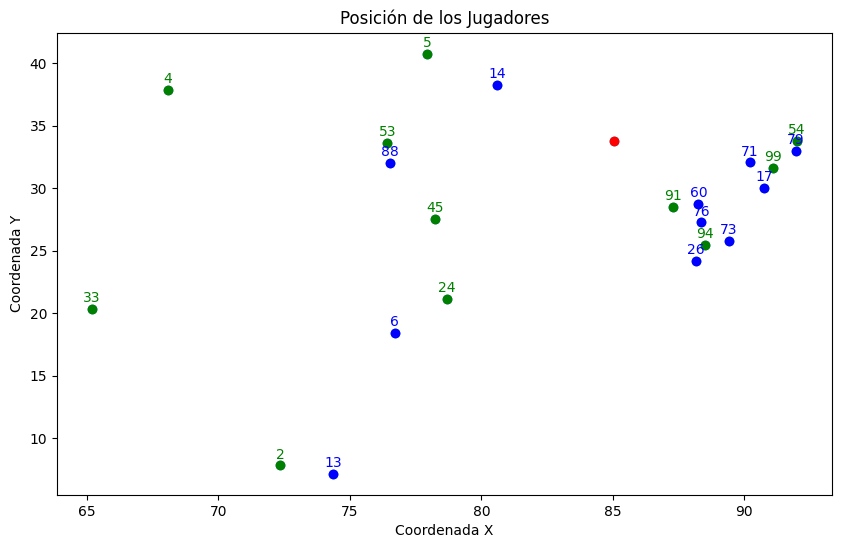

In [76]:
import matplotlib.pyplot as plt
import itertools

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(snapshot['x'], snapshot['y'], marker='o')

# Añadir etiquetas y título
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Posición inicial de los Jugadores')


# Añadir etiquetas para cada punto
for i, row in snapshot.iterrows():
    if row['club'] == clubs[0]:
      color = 'blue'
    elif row['club'] == clubs[1]:
      color = 'green'
    else:
      color = 'red'
    if color != 'red':
      plt.annotate(int(row['jerseyNumber']), (row['x'], row['y']), textcoords="offset points", xytext=(0, 5), ha='center',color=color)
    plt.scatter(row['x'], row['y'],color=color)

# Mostrar el gráfico
plt.show()

Se muestra cada equipo en un color y el balón en rojo. Cada jugador tiene un número de jersey.

# Filtración de datos

Quitaremos los datos irrelevantes para la red, como el nombre de los jugadores.

La manera en la que vamos a usar los datos